In [48]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
import matplotlib.pyplot as plt


In [25]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#CONSTANT
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

#load dataset. Connect the device with internet. It will download the dataset and save it in a filder named .keras
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [26]:
print(X_train.shape, "X_train shape")
print(X_test.shape, "X_test shape")
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3) X_train shape
(10000, 32, 32, 3) X_test shape
(50000, 1)
(10000, 1)


In [27]:
X_train.ndim

4

In [28]:
#print(X_train)

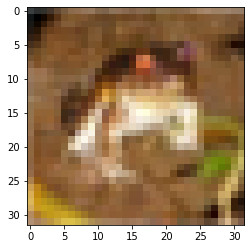

(32, 32, 3)


In [29]:
plt.imshow(X_train[0])
plt.show()
print(X_train[567].shape)

In [30]:
X_train.ndim

4

In [31]:
#convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [34]:
#model
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_3 (Activation)    (None, 512)              

In [51]:
#train
model.compile(loss='categorical_crossentropy',optimizer='Adagrad',  metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH, validation_split = VALIDATION_SPLIT,
          verbose = VERBOSE)

score = model.evaluate(X_test, Y_test,batch_size = BATCH_SIZE,verbose = VERBOSE)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])
#SGD, Adam, RMSprop

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 50s 1ms/step - loss: 2.0165 - accuracy: 0.3495 - val_loss: 1.5031 - val_accuracy: 0.4669
Epoch 2/20
40000/40000 [==============================] - 66s 2ms/step - loss: 1.4746 - accuracy: 0.4755 - val_loss: 1.3676 - val_accuracy: 0.5240
Epoch 3/20
40000/40000 [==============================] - 68s 2ms/step - loss: 1.3761 - accuracy: 0.5120 - val_loss: 1.2891 - val_accuracy: 0.5567
Epoch 4/20
40000/40000 [==============================] - 70s 2ms/step - loss: 1.3017 - accuracy: 0.5380 - val_loss: 1.2353 - val_accuracy: 0.5761
Epoch 5/20
40000/40000 [==============================] - 58s 1ms/step - loss: 1.2551 - accuracy: 0.5577 - val_loss: 1.1876 - val_accuracy: 0.5972
Epoch 6/20
40000/40000 [==============================] - 53s 1ms/step - loss: 1.2104 - accuracy: 0.5761 - val_loss: 1.1626 - val_accuracy: 0.6047
Epoch 7/20
40000/40000 [==============================] - 53s 1ms/st

In [52]:
#Using different optimizer we can change accuracy.